## INFO-F-413 - Data Structures and Algorithms - 2021

## Assignment 2: Maximum Satisfaction

### Name: Hoang Hai Nam
### M. No.: 443146

Python version used and tested : 3.8.12

Imported libraries: timeit, matplotlib, random


# 1. Imports & Libraries

In [33]:
import timeit as ti
import matplotlib.pyplot as plt
import random as rd

# 2. Functions

In [34]:
def plotruntime(f,r,trials=1,figsize=[7,7]):
    Times=[ti.timeit(lambda:f(n),number=trials)/trials for n in r]
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r,Times)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")

    
def plotruntimes(functions,labels,r,trials=5,figsize=[7,7]):
    fig, ax = plt.subplots(figsize=figsize)
    for f,l in zip(functions,labels):
        Times=[ti.timeit(lambda:f(n),number=trials)/trials for n in r]
        ax.plot(r,Times,label=l)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    ax.set_title("Runtime plot: "+str(trials)+" trial"+("s" if trials>1 else ""))
    ax.legend()


In [35]:
def cnftoclaus(filename):
    """Reads cnf file and returns a tuple containing list of clauses and the number of variables"""
    file = open(filename, 'r')
    file = file.readlines()
    file = [line.rstrip() for line in file]
    # purge empty lists because those exists in the cnf for some reason
    file = [x for x in file if x != ""]
    for line in file:
        if line[0] == 'p':
            varsnum = int(line.split(" ")[2])
            break
    return [[int(n) for n in line.split() if n != '0'] for line in file if line[0] not in ("c", "p", "%")], varsnum


def randombools(v):
    """Generate a list of v random booleans of length , with None at the start of the list"""
    res = [None]
    for i in range(v):
        res.append(bool(rd.getrandbits(1)))
    return res


def validate(clauses, ass):
    """Counts how many clauses are satisfied with the given assignment
    Input:
    clauses: the set of clauses to validate
    ass: the assignment in question
    Output:
    returns the number of satisfied clauses"""
    satisfied = 0
    # for the clause in clauses
    for C in clauses:
        # initiate boolean list
        logic = []
        # for variable in the clause
        for V in C:
            if V < 0:
                # inversing the logic for negative variables
                logic.append(not ass[-V])
            else:
                logic.append(ass[V])
        # synonym to "or" logic over the boolean list
        if any(logic):
            satisfied += 1
    return satisfied / len(clauses)


def approxmax3sat(cset, nv):
    """Approximate a maximum satisfiability solution to a CNF, should work when literals are scaled up
    Inputs: str:filename
    Outputs: truth assignments to variables as a list and satisfiability as a rate"""
    rate = 0
    res = []
    trials = 0
    while rate < 0.875:
        trials += 1
        res = randombools(nv)
        rate = validate(cset, res)
    return res[1:], rate, trials


def plot3sataccm(filename, figsize=[7, 7], r=range(1, 1000)):
    """Plots the satisfiability of the 2 algorithms over increasing number of clauses
    """
    clauses, nv = cnftoclaus(filename)
    fig, ax = plt.subplots(figsize=figsize)
    # list of rates of base algorithm
    brates = []
    # list of rates of highpass algorithm
    arates = []
    for n in r:
        arates.append(approxmax3sat(clauses[:n], nv)[1])
        brates.append(validate(clauses[:n], randombools(nv)))
    ax.plot(r, arates, label="Approx")
    ax.plot(r, brates, label="Base")
    ax.set_xlabel("Number of clauses")
    ax.set_ylabel("Sucess rate")
    ax.set_title("Sucess rates of Base and Approximation algorithms")
    ax.legend()


def plot3sattrials(filename, figsize=[7, 7], r=range(1, 1000)):
    """Plots the number of trials the algorithm had to do before finding an answer
        """
    clauses, nv = cnftoclaus(filename)
    fig, ax = plt.subplots(figsize=figsize)
    # list of rates of highpass algorithm
    arates = []
    for n in r:
        arates.append(approxmax3sat(clauses[:n], nv)[2])
    ax.plot(r, arates, label="Approx")
    ax.set_xlabel("Number of clauses")
    ax.set_ylabel("Number of trials")
    ax.set_title("Number of trials taken by the Approximation Algorithm")
    ax.legend()


    
    
    
    
    
    

# 3. Validation

In [36]:
cset, nv = cnftoclaus("rdsat27.cnf")
reso, resrate,ttrials = approxmax3sat(cset,nv)
print("The winning assignment is: ", reso)
print("Its rate of satisfiability is: ", resrate)
print("The solutions was found after", ttrials, "iterations")





The winning assignment is:  [True, False, False, False, False, True, True, True, False, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False, True, True, True, False, False, False, False, True, False, True, True, True, False, True, True, False, False, False, True, False, False, False, True, True, True, False, True, True, True, False, True, True, False, False, False, True, True, False, True, False, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False]
Its rate of satisfiability is:  0.8881118881118881
The solutions was found after 1 iterations


# 4. Implementation

<div style="text-align: justify">
For the implementation it's not very much different from the pseudocode described below, I have 3 main functions, randombools() generates a v number of random booleans, validate() that takes in a set of clauses, an truth assignment from randombools() and see how much that assignment satisfy the clauses in terms of rate, a helper function approxmax3sat() that regenerate a new random assignment until it reaches 7/8 satisfiability.
</div>

# 5. Results & Findings

## 5.1 Test on satisfied dataset of 1000 clauses

### 5.1.1 Sucess rates

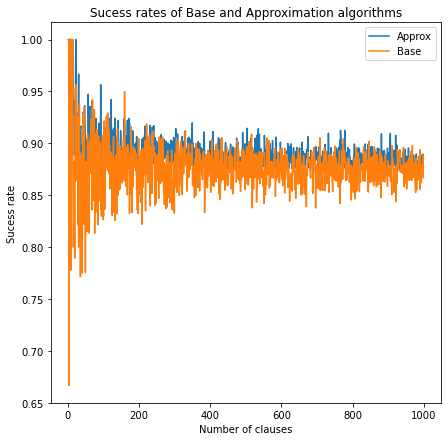

In [37]:
plot3sataccm('uf250-069.cnf')

### 5.1.2 Runtime

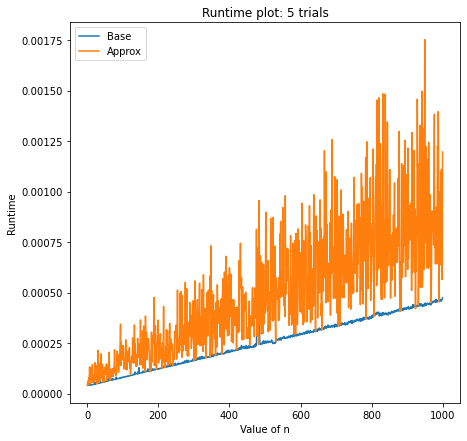

In [38]:
clauses, nv = cnftoclaus('uf250-069.cnf')
plotruntimes([lambda n:validate(clauses[:n], randombools(nv)),
              lambda n:approxmax3sat(clauses[:n], nv)],
             ["Base","Approx"],range(1,1000))

### 5.1.3 Trials taken

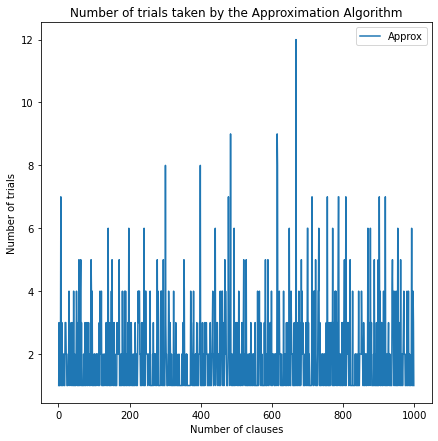

In [39]:
plot3sattrials('uf250-069.cnf')

## 5.2 Test on unsatisfied dataset of 1000 clauses

### 5.2.1 Sucess rates

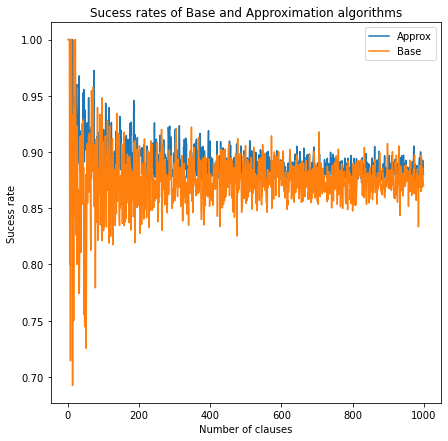

In [40]:
plot3sataccm('uuf250-042.cnf')

### 5.2.2 Runtime

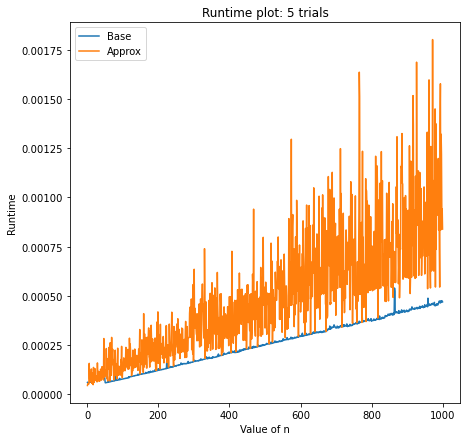

In [41]:
clauses, nv = cnftoclaus('uuf250-042.cnf')
plotruntimes([lambda n:validate(clauses[:n], randombools(nv)),
              lambda n:approxmax3sat(clauses[:n], nv)],
             ["Base","Approx"],range(1,1000))

### 5.2.3 Trials taken

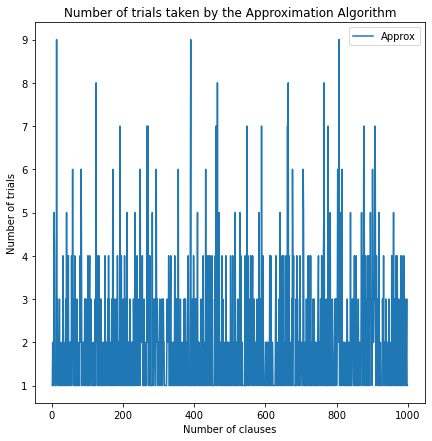

In [42]:
plot3sattrials('uuf250-042.cnf')

Between satisfied dataset and unsatisfied dataset there are not much difference in terms of the rate of satisfiability, runtime and trials taken.

# 6. Discussions

## The algorithm

<div style="text-align: justify">
To solve the max 3-SAT problem I first propose a randomised algorithm that assigns boolean independently and equiprobably to variables, equiprobably means with priority $\frac{1}{2}$.
</div>

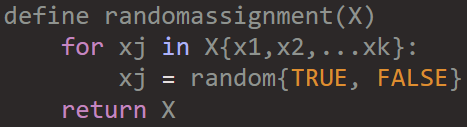


I will proceed to theoretically prove that such algorithm will satisfy with at least $\frac{7}{8}$ of the clauses. The analysis will heavily mirror the M&R Textbook, Chapter 5.2. on Maximum Satisfiability.

First off let's prove that for $m$ clauses, there's at least 1 random truth assignment that satisfy $\frac{7}{8}$ of the clauses or $\frac{7}{8}m$ clauses

Let $Z_i$ be a random (boolean) variable associated with $i^{th}$ clause $C_i$. $Z_i$ is 1 when $C_i$ is satisfied, and 0 otherwise.

\begin{equation}
  Z_i =
    \begin{cases}
      1 & \text{if $C_i$ is satisfied}\\
      0 & \text{otherwise}\\
    \end{cases}       
\end{equation}

So for any clauses that contain $k$ literals and following this assignment, the probability that it's NOT satisfied by the random assignment is $2^{-k}$, in our case with 3 literals:

\begin{equation}
Pr(C_j \text{ is satisfied}) = 1 - 2^{-k} = 1 - 2^{-3} = \frac{7}{8}
\end{equation}
In the set of $m$ clauses, the number of clauses satisfied will then be the sum of all $Z_i$, $Z$.
\begin{equation}
Z = \sum_{i=1}^{m} Z_i
\end{equation}

And by linearity of expectation, the expectance of $Z$ is equal to the sum of expectations of $Z_i$

\begin{equation}
E[Z] = \sum_{i=1}^{m} E[Z_i]
\end{equation}

Then we have the number of clauses satisfied within $m$ clauses as.. 

\begin{equation}
E[Z] = \sum_{i=1}^{m} Pr(C_j \text{ is satisfied}) = \frac{7}{8}m
\end{equation}

This proves that there's at least 1 assignment that satisfies at least 7/8$^{th}$ of the clauses.
<div style="text-align: justify">
So I propose to just run a *helper, high-pass function* that repeats the above algorithm until it returns a result in which at least 7/8 of the clauses are satisfied. And that's the Las Vegas algorithm, which will always outputs an answer of at least 7/8 satisfied clauses, betting on the fact that, through theoretical proof, there exist at least a random assignment that satisfy this sucess condition and that we will land on one of them while repeating.
</div>

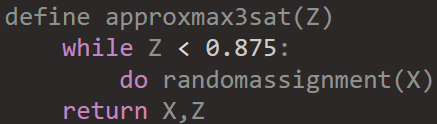

<div style="text-align: justify">
This is somewhat of a dream performance for sets of clauses in which the number of literals are guarenteed to be 3, in reality, the algorithm's performance is bottlenecked by clauses which contains less than 3 literals. However the datasets we test it on will have only clauses of 3 literals.
</div>

## Sucess rate

Somewhat surprisingly, our base algorithm (1 trial) performance actually follows the expected 7/8 performance ratio quite well, despite dipping below it but that's to be expected with the randomness. Our approximation algorithm is a high-pass algorithm so obviously the answer will always be above 7/8 satisfiability. It does seem to somewhat tend downwards as m increases at $m\leq 300$ but also its erraticity, however the ratio does seem to steadily follow the expected ratio at larger values.

## Runtime

<div style="text-align: justify">
There's not much to say about the runtime however, theoretically speaking. The theoretical runtime for the base case is simply $O(n)$ with $n$ being the number of variables. Even in the unlucky case that the main helper algorithm struggles to land on one of the good(>7/8) truth assignments over and over again, the runtime would simply be $\sum_{i=1}^{r} O(n) = O(\sum_{i=1}^{r}n) = O(rn) = O(n)$ with $r$ being the number of repetitions.

If we take in account the runtime of the validation of the assignment to calculate the satisfiability(which is essential for the goal we're trying to achieve), we have $O(m+n)$ with $m$ being the number of clauses.
    
<div style="text-align: justify">
While I can't really control the number of variables of the test datasets to test the runtime based on number of variables, what I can control is the number of clauses, the runtime comparison between base algorithm and the approximation algorithm is consistent with the theory, with the base algorithm taking linear O(n) time, and while approximation algorithm is erratic due to its randomised nature, it still follows linear  runtime.
    </div>

In actuality, in the M&R book they did introduce and proved that the expected number of trials to be dependent on $m$ and is at most $8m$
    
Let $p$ be the probability that we satisfy at least $\frac{7}{8}m$ of the clauses, and $p_j$ the probability that exactly $j$ clauses are satisfied.

\begin{equation}
    7m/8 = E[X]\\
\end{equation}
\begin{equation}
        = \sum_{j} jp_j\\
\end{equation}
\begin{equation}
    = \sum_{0\leq j<7m/8} jp_j + \sum_{7m\leq j<8}jp_j\\
\end{equation}
\begin{equation}
    \leq (7m/8-1/8) \sum_{0\leq j<7m/8} p_j + m \sum_{0\leq j<7m/8} p_j\\
\end{equation}
\begin{equation}
    \leq (7m/8-1/8) + mp\\
\end{equation}
\begin{equation}
    1/8 \leq mp
\end{equation}

    
with $p \geq \frac{1}{8m}$ we can have the upper bound on the expected number of trials as $8m$
    
It is curious that our findings on number of trials needed is extremely low, and does not seem to change at all as m increases, not to mention that it does not even approach the upper bound.

I unfortunately do not have an explaination for this effect.